### Project outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Goal is to predict the **total transaction revenue**. 
- Decide aboute a good evaluation strategy and justify your choice.
- Split dataset into train and test dataset. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization expected. 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from sklearn.model_selection import train_test_split

### Load Data

In [2]:
gstore = pd.read_csv('data.csv')
gstore.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1


### Explore data and change datatype
### Find missing value

In [3]:
gstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
channelGrouping                   20000 non-null object
customDimensions                  20000 non-null object
date                              20000 non-null int64
device                            20000 non-null object
fullVisitorId                     20000 non-null uint64
geoNetwork                        20000 non-null object
hits                              20000 non-null object
socialEngagementType              20000 non-null object
trafficSource                     20000 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float6

In [4]:
gstore.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,9873.0,20000.000000,15088.0,19999.000000,9120.000000,10101.000000,1.930000e+02,1.930000e+02,196.000000,20000.0
mean,2.017041e+07,4.533406e+18,1.498277e+09,2.264200,1.498277e+09,1.0,4.794450,1.0,3.971549,4.456140,264.244629,1.278192e+08,1.087636e+08,1.040816,1.0
std,4.737638e+03,3.067707e+18,1.565797e+07,7.876636,1.565797e+07,0.0,9.080243,0.0,6.498605,12.593541,459.176173,2.432262e+08,1.711924e+08,0.222727,0.0
min,2.016090e+07,8.864048e+13,1.472799e+09,1.000000,1.472800e+09,1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.990000e+06,1.990000e+06,1.000000,1.0
25%,2.017020e+07,1.618305e+18,1.486118e+09,1.000000,1.486118e+09,1.0,1.000000,1.0,1.000000,1.000000,35.000000,2.799000e+07,2.102000e+07,1.000000,1.0
50%,2.017062e+07,4.446795e+18,1.498247e+09,1.000000,1.498247e+09,1.0,2.000000,1.0,2.000000,1.000000,94.000000,5.171000e+07,4.458000e+07,1.000000,1.0
75%,2.017113e+07,7.218982e+18,1.512038e+09,1.000000,1.512038e+09,1.0,5.000000,1.0,4.000000,1.000000,270.000000,1.141600e+08,1.087200e+08,1.000000,1.0
max,2.018042e+07,9.999250e+18,1.523862e+09,401.000000,1.523862e+09,1.0,229.000000,1.0,165.000000,96.000000,5553.000000,2.103690e+09,1.171470e+09,3.000000,1.0


### I take JSON type columns out to another dataframe called gJSON in order to easy change the type of value.

In [6]:
gJSON = pd.read_csv('data.csv', usecols=['customDimensions','device','geoNetwork','hits','trafficSource'])
gJSON.head()

,customDimensions,device,geoNetwork,hits,trafficSource
0,"[{'index': '4', 'value': 'EMEA'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...","{'campaign': '(not set)', 'source': 'google', ..."
1,"[{'index': '4', 'value': 'North America'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",{'referralPath': '/a/google.com/transportation...
2,"[{'index': '4', 'value': 'North America'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...","{'isTrueDirect': True, 'campaign': '(not set)'..."
3,"[{'index': '4', 'value': 'EMEA'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...","{'campaign': '(not set)', 'source': 'google', ..."
4,"[{'index': '4', 'value': 'Central America'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...","{'campaign': '(not set)', 'source': 'google', ..."


In [7]:
gJSON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
customDimensions    20000 non-null object
device              20000 non-null object
geoNetwork          20000 non-null object
hits                20000 non-null object
trafficSource       20000 non-null object
dtypes: object(5)
memory usage: 781.3+ KB


### All 5 columns have 20000 rows

In [8]:
def todict(dic, key, value):
    if key in dic:
        dic[key].append(value)
    else:
        dic[key] = [value]
    return dic


def resolve_json(hitsdic, hits_json, key='NoneName'):
    if type(hits_json) == list:
        if len(hits_json) == 0:
            pass
        else:
            for subjson in hits_json:
                hitsdic = resolve_json(hitsdic, subjson)
    elif type(hits_json) == dict:
        for i in hits_json.keys():
            hitsdic = resolve_json(hitsdic, hits_json[i],i)
    else:
        hitsdic = todict(hitsdic, key, hits_json)
    return hitsdic


def complex_replace(x):
    dic = {}
    return resolve_json(dic, json.loads(x.replace('\'','\"'). \
                                        replace('TRUE','true'). \
                                        replace('True','true'). \
                                        replace('FALSE','false'). \
                                        replace('False','false'). \
                                        replace(', \"',', !&~'). \
                                        replace('\", ','!&~, '). \
                                        replace('\": ','!&~: '). \
                                        replace(': \"',': !&~'). \
                                        replace(' {\"',' {!&~'). \
                                        replace('\"}, ','!&~}, '). \
                                        replace('[{\"','[{!&~'). \
                                        replace('\"}]','!&~}]'). \
                                        replace('\"','_'). \
                                        replace('!&~','\"'). \
                                        encode('gbk','ignore'). \
                                        decode('utf-8','ignore'). \
                                        replace('\\','')))


def replace(x):
    return  json.loads(x.replace('\'','\"').replace('False', 'false').replace('True'))

In [9]:
val5 = gJSON['customDimensions'][0].replace('\'', '\"').replace('False', 'false')
obj5 = json.loads(val5)
obj5[0] #list type

{'index': '4', 'value': 'EMEA'}

In [10]:
Value = []
for i in range(len(gJSON)):
    val5 = gJSON['customDimensions'][i].replace('\'', '\"').replace('False', 'false')
    obj5 = json.loads(val5)
    if len(obj5) == 0:
        obj5.append({'value': 'NaN'})
    Value.append(obj5[0]['value'])
#len(set(Value))
df5 = pd.DataFrame({'customDimensions':Value})
df5.head()

,customDimensions
0,EMEA
1,North America
2,North America
3,EMEA
4,Central America


In [11]:
val2 = gJSON['device'][2].replace('\'', '\"').replace('False', 'false').replace('True','true')
obj2 = json.loads(val2)
obj2  #dictionary type

{'browser': 'Chrome',
 'browserSize': 'not available in demo dataset',
 'browserVersion': 'not available in demo dataset',
 'deviceCategory': 'mobile',
 'flashVersion': 'not available in demo dataset',
 'isMobile': True,
 'language': 'not available in demo dataset',
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'operatingSystem': 'Android',
 'operatingSystemVersion': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset'}

### I wrote a method to grab the data in the feathers that I think is useful then put them into a dataframe

In [12]:
JSON_FEATURES = {'customDimensions': ['value'],'device': ['deviceCategory','browser'], 'geoNetwork':['continent','country']}
df = pd.DataFrame()
for feature in JSON_FEATURES.keys(): #feature = 'device'
    for item in JSON_FEATURES[feature]:  #JSON_FEATURES['device'] = ['deviceCategory','browser'], item = 'deviceCategory'or'browser'
        Temp = []
        for i in range(len(gJSON)):
            val = gJSON[feature][i].replace('\'', '\"').replace('False', 'false').replace('True','true')
            obj = json.loads(val)
            if isinstance(obj, list):
                if len(obj) == 0:
                    Temp.append('NaN')  #use 'NaN' for missing data
                else:
                    Temp.append(obj[0][item])
            else:
                if item not in obj.keys():
                    Temp.append('NaN')  #use 'NaN' for missing data
                else:
                    Temp.append(obj[item])
        df_temp = pd.DataFrame({item:Temp}) 
        df = df_temp.join(df)

gClean = df
gClean.head()

,country,continent,browser,deviceCategory,value
0,Germany,Europe,Firefox,desktop,EMEA
1,United States,Americas,Chrome,desktop,North America
2,United States,Americas,Chrome,mobile,North America
3,Turkey,Asia,Chrome,desktop,EMEA
4,Mexico,Americas,Chrome,desktop,Central America


###  I want to change category variables to dummy variables. I found that cloumns "channelGrouping" and "socialEngagementType" are also category variables in gstore dataframe. However, columns "socialEngagementType" is useless due to all value is the same so I won't change it

In [13]:
gstore['channelGrouping'].unique()

array(['Organic Search', 'Referral', 'Direct', 'Paid Search', 'Display',
       'Affiliates', 'Social'], dtype=object)

In [14]:
gstore['socialEngagementType'].unique()

array(['Not Socially Engaged'], dtype=object)

In [15]:
gchannelGrouping = gstore[['channelGrouping']]
gchannelGrouping.head()

,channelGrouping
0,Organic Search
1,Referral
2,Direct
3,Organic Search
4,Organic Search


In [16]:
gCleanest = gchannelGrouping.join(gClean)
gCleanest.head()

,channelGrouping,country,continent,browser,deviceCategory,value
0,Organic Search,Germany,Europe,Firefox,desktop,EMEA
1,Referral,United States,Americas,Chrome,desktop,North America
2,Direct,United States,Americas,Chrome,mobile,North America
3,Organic Search,Turkey,Asia,Chrome,desktop,EMEA
4,Organic Search,Mexico,Americas,Chrome,desktop,Central America


### Change Categories data to dummy data

In [17]:
gDummy = pd.get_dummies(gCleanest)
gDummy.head()

,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,country_(not set),country_Afghanistan,country_Albania,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [18]:
gDummy.describe()

,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,country_(not set),country_Afghanistan,country_Albania,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,0.02125,0.152350,0.018100,0.476750,0.026350,0.132450,0.17275,0.001050,0.000150,0.000300,...,0.001800,0.69940,0.264200,0.036400,0.128300,0.014900,0.18875,0.180250,0.464400,0.023400
std,0.14422,0.359369,0.133316,0.499472,0.160178,0.338988,0.37804,0.032387,0.012247,0.017318,...,0.042389,0.45853,0.440917,0.187288,0.334432,0.121156,0.39132,0.384405,0.498743,0.151174
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Find missing data. I will later than drop the columns that include too many missing data where missing data exceed over 50 percent of the column.

In [5]:
def missing_data(data):
    count = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    df = pd.concat([count, percent], axis=1, keys=['Count', 'Percent%'])
    return df.loc[~(df['Count']==0)]

missing_data(gstore)

,Count,Percent%
totals_transactionRevenue,19807,99.035
totals_totalTransactionRevenue,19807,99.035
totals_transactions,19804,99.020
totals_sessionQualityDim,10880,54.400
totals_bounces,10127,50.635
totals_timeOnSite,9899,49.495
totals_newVisits,4912,24.560
totals_pageviews,1,0.005


In [19]:
gDrop = gstore.join(gDummy).drop(['channelGrouping','date','visitStartTime','customDimensions','device','fullVisitorId','hits','geoNetwork','socialEngagementType','trafficSource','visitId','totals_totalTransactionRevenue'],axis=1)
gDrop.head()

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,totals_visits,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
0,1,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,1,...,0,1,0,0,0,0,1,0,0,0
1,6,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,1,...,0,1,0,0,0,0,0,0,1,0
2,1,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,1,...,0,0,1,0,0,0,0,0,1,0
3,1,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,1,...,0,1,0,0,0,0,1,0,0,0
4,1,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,1,...,0,1,0,0,0,1,0,0,0,0


In [20]:
gDrop = gstore.join(gDummy).drop(['channelGrouping','date','visitStartTime','customDimensions','device','fullVisitorId',
                                  'hits','geoNetwork','socialEngagementType','trafficSource','visitId',
                                  'totals_totalTransactionRevenue','totals_transactions','totals_sessionQualityDim',
                                  'totals_bounces'],axis=1)
gDrop.head()

,visitNumber,totals_hits,totals_newVisits,totals_pageviews,totals_timeOnSite,totals_transactionRevenue,totals_visits,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
0,1,1,1.0,1.0,NaN,NaN,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,6,2,NaN,2.0,28.0,NaN,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,2,1.0,2.0,38.0,NaN,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,2,1.0,2.0,1.0,NaN,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,2,1.0,2.0,52.0,NaN,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Fill missing data with mean value in ``totals_timeonSite`` column 

In [21]:
gDrop[['totals_timeOnSite']] = gDrop[['totals_timeOnSite']].fillna(gDrop[['totals_timeOnSite']].mean())
gDrop[['totals_timeOnSite']].head()

,totals_timeOnSite
0,264.244629
1,28.000000
2,38.000000
3,1.000000
4,52.000000


In [22]:
gLast = gDrop.fillna(0)
gLast.head()

,visitNumber,totals_hits,totals_newVisits,totals_pageviews,totals_timeOnSite,totals_transactionRevenue,totals_visits,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
0,1,1,1.0,1.0,264.244629,0.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,6,2,0.0,2.0,28.000000,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,2,1.0,2.0,38.000000,0.0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,2,1.0,2.0,1.000000,0.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,2,1.0,2.0,52.000000,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [23]:
X = gLast[gLast.columns.drop('totals_transactionRevenue',1)]
y = gLast[['totals_transactionRevenue']]

In [24]:
y_binary = (y > 0).astype(int)  #Change total_transactionRevenue to binary datatype. 
# If zero revenue then represent 0, positive revenue then represent 1
y_binary.describe() 

,totals_transactionRevenue
count,20000.000000
mean,0.009650
std,0.097762
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [27]:
g193 = gLast[gLast['totals_transactionRevenue']>0]
g193.head()

,visitNumber,totals_hits,totals_newVisits,totals_pageviews,totals_timeOnSite,totals_transactionRevenue,totals_visits,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
433,4,9,0.0,9.0,261.0,15190000.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
550,11,15,0.0,12.0,285.0,8000000.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
555,6,15,0.0,15.0,1044.0,57300000.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
597,17,18,0.0,16.0,514.0,18230000.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
619,1,21,1.0,20.0,487.0,12310000.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [135]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X = g193[g193.columns.drop('totals_transactionRevenue',1)]
y = g193['totals_transactionRevenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [137]:
yRidge = reg.predict(X_test) 
yRidge

array([-5.83553957e+06,  1.13669722e+08,  2.09003156e+08, -5.78107686e+07,
        8.52658993e+07,  1.68178421e+07,  2.95929028e+08,  4.14231947e+08,
        2.03847524e+08,  2.23938355e+08,  1.45153751e+08,  1.51380110e+08,
       -8.06489670e+06,  1.12435436e+08,  7.31757612e+07,  1.07877237e+08,
        3.60784057e+08,  4.58055898e+07,  1.70354935e+08,  7.18874908e+07,
        5.13462372e+08,  1.77659592e+08,  1.53264365e+08,  5.53813383e+06,
        1.54098284e+08,  2.38111015e+08,  2.11786847e+08,  7.55651079e+07,
        1.11014034e+08,  1.20238939e+08,  2.23788968e+07,  1.95723187e+08,
        1.84144186e+08,  8.20817751e+07,  2.26411505e+08,  6.08138856e+07,
        7.79795751e+06,  1.25524246e+08,  8.32813356e+07])

In [136]:
w = reg.coef_
w[0]

3541226.682093203

In [138]:
predicted_revenue = X_test[X_test.columns[0]] * w[0] #193*1 array
for i in range(1,208):
    predicted_revenue = predicted_revenue + X_test[X_test.columns[i]] * w[i]

predicted_revenue = predicted_revenue + reg.intercept_
predicted_revenue 

12866   -5.835540e+06
19764    1.136697e+08
19782    2.090032e+08
678     -5.781077e+07
9726     8.526590e+07
17390    1.681784e+07
19740    2.959290e+08
9755     4.142319e+08
6304     2.038475e+08
9753     2.239384e+08
4583     1.451538e+08
12924    1.513801e+08
14391   -8.064897e+06
9717     1.124354e+08
9706     7.317576e+07
9696     1.078772e+08
12908    3.607841e+08
619      4.580559e+07
692      1.703549e+08
17252    7.188749e+07
716      5.134624e+08
6390     1.776596e+08
15480    1.532644e+08
19675    5.538134e+06
12938    1.540983e+08
15508    2.381110e+08
19732    2.117868e+08
14398    7.556511e+07
4474     1.110140e+08
12859    1.202389e+08
12912    2.237890e+07
9745     1.957232e+08
684      1.841442e+08
9740     8.208178e+07
14419    2.264115e+08
12832    6.081389e+07
14359    7.797958e+06
15513    1.255242e+08
6381     8.328134e+07
dtype: float64

In [154]:
yRidge #predicted data

array([-5.83553957e+06,  1.13669722e+08,  2.09003156e+08, -5.78107686e+07,
        8.52658993e+07,  1.68178421e+07,  2.95929028e+08,  4.14231947e+08,
        2.03847524e+08,  2.23938355e+08,  1.45153751e+08,  1.51380110e+08,
       -8.06489670e+06,  1.12435436e+08,  7.31757612e+07,  1.07877237e+08,
        3.60784057e+08,  4.58055898e+07,  1.70354935e+08,  7.18874908e+07,
        5.13462372e+08,  1.77659592e+08,  1.53264365e+08,  5.53813383e+06,
        1.54098284e+08,  2.38111015e+08,  2.11786847e+08,  7.55651079e+07,
        1.11014034e+08,  1.20238939e+08,  2.23788968e+07,  1.95723187e+08,
        1.84144186e+08,  8.20817751e+07,  2.26411505e+08,  6.08138856e+07,
        7.79795751e+06,  1.25524246e+08,  8.32813356e+07])

In [155]:
pd.Series(y_test).values #real data

array([6.9900e+06, 1.7683e+08, 3.1980e+07, 5.6090e+07, 2.3679e+08,
       3.0960e+07, 1.1180e+08, 2.6479e+08, 8.4900e+06, 6.4700e+07,
       3.5390e+07, 1.3590e+07, 3.1930e+07, 2.2970e+07, 5.7570e+07,
       4.4790e+07, 3.3980e+07, 1.2310e+07, 1.2219e+08, 2.1990e+07,
       9.1200e+06, 8.5430e+07, 2.8780e+07, 6.4900e+06, 3.3531e+08,
       1.0945e+08, 9.5940e+07, 2.4404e+08, 3.9573e+08, 1.6790e+07,
       7.4590e+07, 5.3560e+07, 6.2710e+07, 3.8350e+07, 3.7960e+07,
       1.0915e+08, 7.9900e+06, 8.1560e+07, 1.0796e+08])

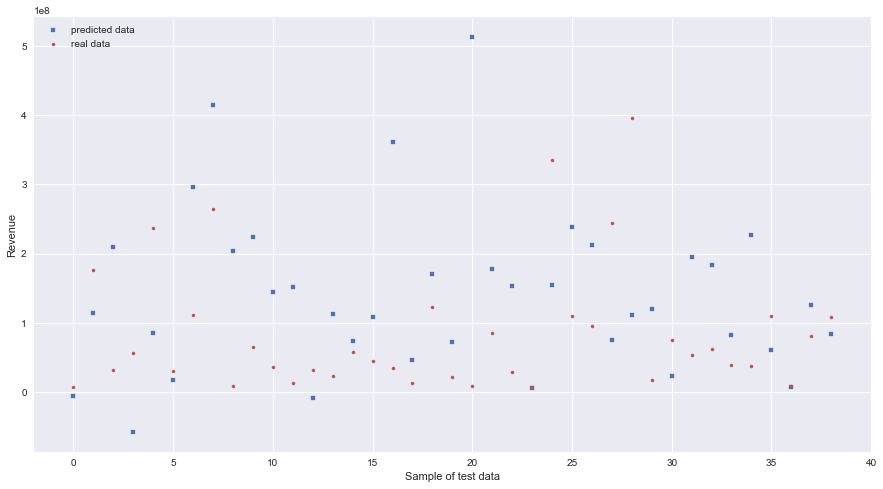

In [165]:
x = range(len(X_test))
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(x, yRidge, s=10,c='b', marker="s", label='predicted data')
ax1.scatter(x, pd.Series(y_test).values, s=10, c='r', marker="o", label='real data')
plt.xlabel("Sample of test data")
plt.ylabel("Revenue")
plt.legend(loc='upper left');
plt.show()

In [36]:
sns.set(color_codes=True)
A = g193.drop(['totals_transactionRevenue'], axis =1)

/Users/kemengting/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


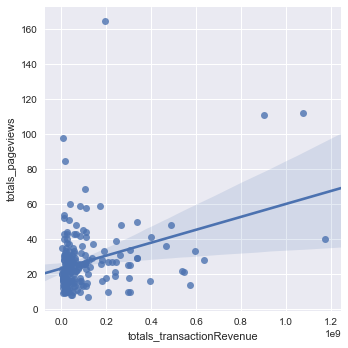

In [38]:
sns.lmplot(x='totals_transactionRevenue', y= 'totals_pageviews', data=g193);

### Fill missing data

In [ ]:
gLast = gDrop.fillna(0)
gLast.head()

In [ ]:
gLast[gLast['totals_transactionRevenue']>0].head()

In [ ]:
len(gLast[gLast['totals_transactionRevenue']>0])

### Only 193 of 20,000 transactionrevenue have a record. That is to say most of the transactions have no consumption.

In [ ]:
gLast.info()

In [ ]:
gLast.columns

### This part I want to seperate 193 of 20000 data to a new dataset

In [ ]:
cols = [c for c in gLast.columns if c[:3] == 'tot']
gRevised = gLast[cols]

In [ ]:
g193X = gLast[gLast['totals_transactionRevenue']>0].drop('totals_transactionRevenue',1)
g193X.head() # Without "total_transactionRevenue" columns, remain columns all regard as feature columns

In [ ]:
X2 = gLast[gLast['totals_transactionRevenue']>0].drop('totals_transactionRevenue',1)
y2 = gRevised[gRevised['totals_transactionRevenue']>0].drop(['totals_bounces','totals_hits','totals_newVisits',
                                                           'totals_pageviews','totals_sessionQualityDim','totals_timeOnSite',
                                                           'totals_transactions','totals_visits'],axis=1)

In [ ]:
y2.head() # "total_transactionRevenue" is the only target column

In [ ]:
g193y = y2
g193y.head() # name it as g193y

In [ ]:
g193Xy = g193y.join(g193X)
g193Xy.head()

### Split data to trainset and test set
## Supervised learning (classification) - Gaussian naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = gLast[gLast.columns.drop('totals_transactionRevenue',1)]
y = gLast[['totals_transactionRevenue']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB        # 1. choose model class
GaussianNB = GaussianNB()                         # 2. instantiate model
GaussianNB.fit(X_train, y_train)                  # 3. fit model to data
y_GaussianNB = GaussianNB.predict(X_test)         # 4. predict on new data

In [ ]:
len(y_train)

In [ ]:
len(y_test)

In [ ]:
y_train.head()

In [ ]:
y_test.head()

### Evaluation

### High accuracy score of all dataset

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_GaussianNB)

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_GaussianNB)

plt.subplots(figsize = (10,10))
sns.heatmap(matrix, square=True, annot=True, cbar=True , cmap = 'Reds')
plt.xlabel('predicted value')
plt.ylabel('true value');

## Supervised learning (classification)- Knn neighborhood, also scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 

X = gLast[gLast.columns.drop('totals_transactionRevenue',1)]
y = gLast[['totals_transactionRevenue']]

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = MinMaxScaler() #classification MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

In [ ]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

### It seems like accuracy is usually in high level score. In this part, I took k=3  for example. 

In [ ]:
knn = KNeighborsClassifier(3)   
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

### Cross-validation through holding set on test data

In [ ]:
from sklearn.cross_validation import train_test_split 
X = gLast[gLast.columns.drop('totals_transactionRevenue',1)]
y = gLast[['totals_transactionRevenue']]

X1, X2, y1, y2 = train_test_split(X, y, train_size=0.2)  # fit the model on one set of data

knn.fit(X1, y1)  # evaluate the model on the test data
y2_knn = knn.predict(X2)
accuracy_score(y2, y2_knn)

## Unsupervised learning (clustering) - Kmeans

In [ ]:
from sklearn.cluster import KMeans          
clusters=2
kmeans = KMeans(n_clusters=clusters)         
kmeans.fit(X_train, y_train)                 
y_clusters = kmeans.predict(X_test)          

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_clusters)

In [ ]:
y_clusters

In [ ]:
kmeans.cluster_centers_ # Representative coordinates of each cluster center

### There is a 46.725 percent accuracy that this model can classify data in their group successful.

## Unsupervised learning (clustering) - GaussianMixture

In [ ]:
from sklearn.mixture import GaussianMixture
X = gLast[gLast.columns.drop('totals_transactionRevenue',1)]
y = gLast[['totals_transactionRevenue']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = GaussianMixture(n_components=2, covariance_type='full')  
model.fit(X_train)                                                
y_gmm = model.predict(X_test) 

In [ ]:
y_gmm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_gmm)

### There is a 53.65 percent accuracy that this model can predicts success.

## Unsupervised learning (dimensionality reduciton) - PCA

In [ ]:
from sklearn.decomposition import PCA  
model = PCA(n_components=2) 
model.fit(X)                     
X_2D = model.transform(X)       

In [ ]:
X_2D

In [ ]:
X_2D[:, 1]

In [ ]:
gLast['PCA1'] = X_2D[:, 0]
gLast['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue ='totals_transactionRevenue',data = gLast, fit_reg=False);

### Use Knn model operate above on this reduced dataset to see is there any difference

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

gLast['PCA1'] = X_2D[:, 0]
gLast['PCA2'] = X_2D[:, 1]
X3 = gLast[['PCA1','PCA2']]
y3 = gLast[['totals_transactionRevenue']]
 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2)

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X3_train, y3_train)
    train_score_array.append(knn.score(X3_train, y3_train))
    test_score_array.append(knn.score(X3_test, y3_test))

In [ ]:
X3_train.head()

In [ ]:
X3_test.head()

In [ ]:
y3_test.head()

In [ ]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
knn = KNeighborsClassifier(2)   
knn.fit(X3_train, y3_train) 
print('Train score: {:.4f}'.format(knn.score(X3_train, y3_train)))
print('Test score: {:.4f}'.format(knn.score(X3_test, y3_test)))

### In this case, after reducing the dimension the variance is getting smaller which indicate that the model has not yet reduced dimension operates better than the model that has reduced dimension. Compare to the test score. Knn score (0.9912) is better than PCA score (0.9888)

## Unsupervised learning (dimensionality reduciton) - ICA

In [ ]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3) 
XICA=ICA.fit_transform(gLast[gLast.columns.drop('totals_transactionRevenue',1)])

In [ ]:
plt.figure(figsize=(6,4))
plt.title('ICA Components')
plt.scatter(XICA[:,0], XICA[:,1])
plt.scatter(XICA[:,1], XICA[:,2])
plt.scatter(XICA[:,2], XICA[:,0])

In [ ]:
yICA=gLast[['totals_transactionRevenue']]

XICA_train, XICA_test, yICA_train, yICA_test = train_test_split(XICA, yICA, test_size = 0.2)
knn = KNeighborsClassifier(3)   
knn.fit(XICA_train,yICA_train) 
print('Train score: {:.4f}'.format(knn.score(XICA_train, yICA_train)))
print('Test score: {:.4f}'.format(knn.score(XICA_test, yICA_test)))

### It's nearly no difference between test score compare the testing score of Knn (k=3) test score (0.9912) with ICA test score (0.9910)